###### Importing the Dependencies


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###### exploratory data analysis

In [6]:
heart_data = pd.read_csv("heart.csv" , encoding = 'UTF-8')

In [7]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
columns_to_drop = ['ChestPainType' , 'RestingECG', 'ExerciseAngina' , 'ST_Slope']
heart_data = heart_data.drop(columns = columns_to_drop  , axis = 1)

In [14]:
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


In [17]:
#change 'Sex' values into 0 and 1 
heart_data['Sex'] = heart_data['Sex'].map({'M' : 0 , 'F' : 1})

In [18]:
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,0,140,289,0,172,0.0,0
1,49,1,160,180,0,156,1.0,1
2,37,0,130,283,0,98,0.0,0
3,48,1,138,214,0,108,1.5,1
4,54,0,150,195,0,122,0.0,0


In [20]:
heart_data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


###### Data visualization

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

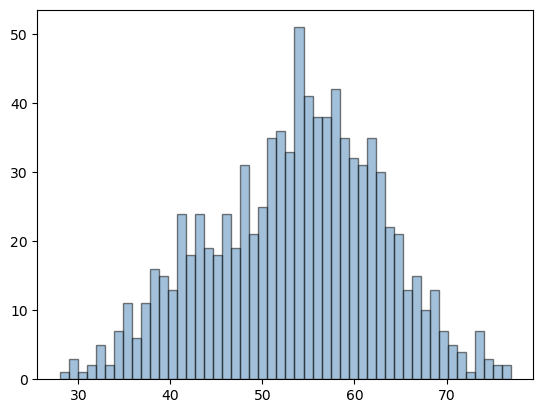

In [25]:
plt.hist(heart_data['Age'], bins=50,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black');

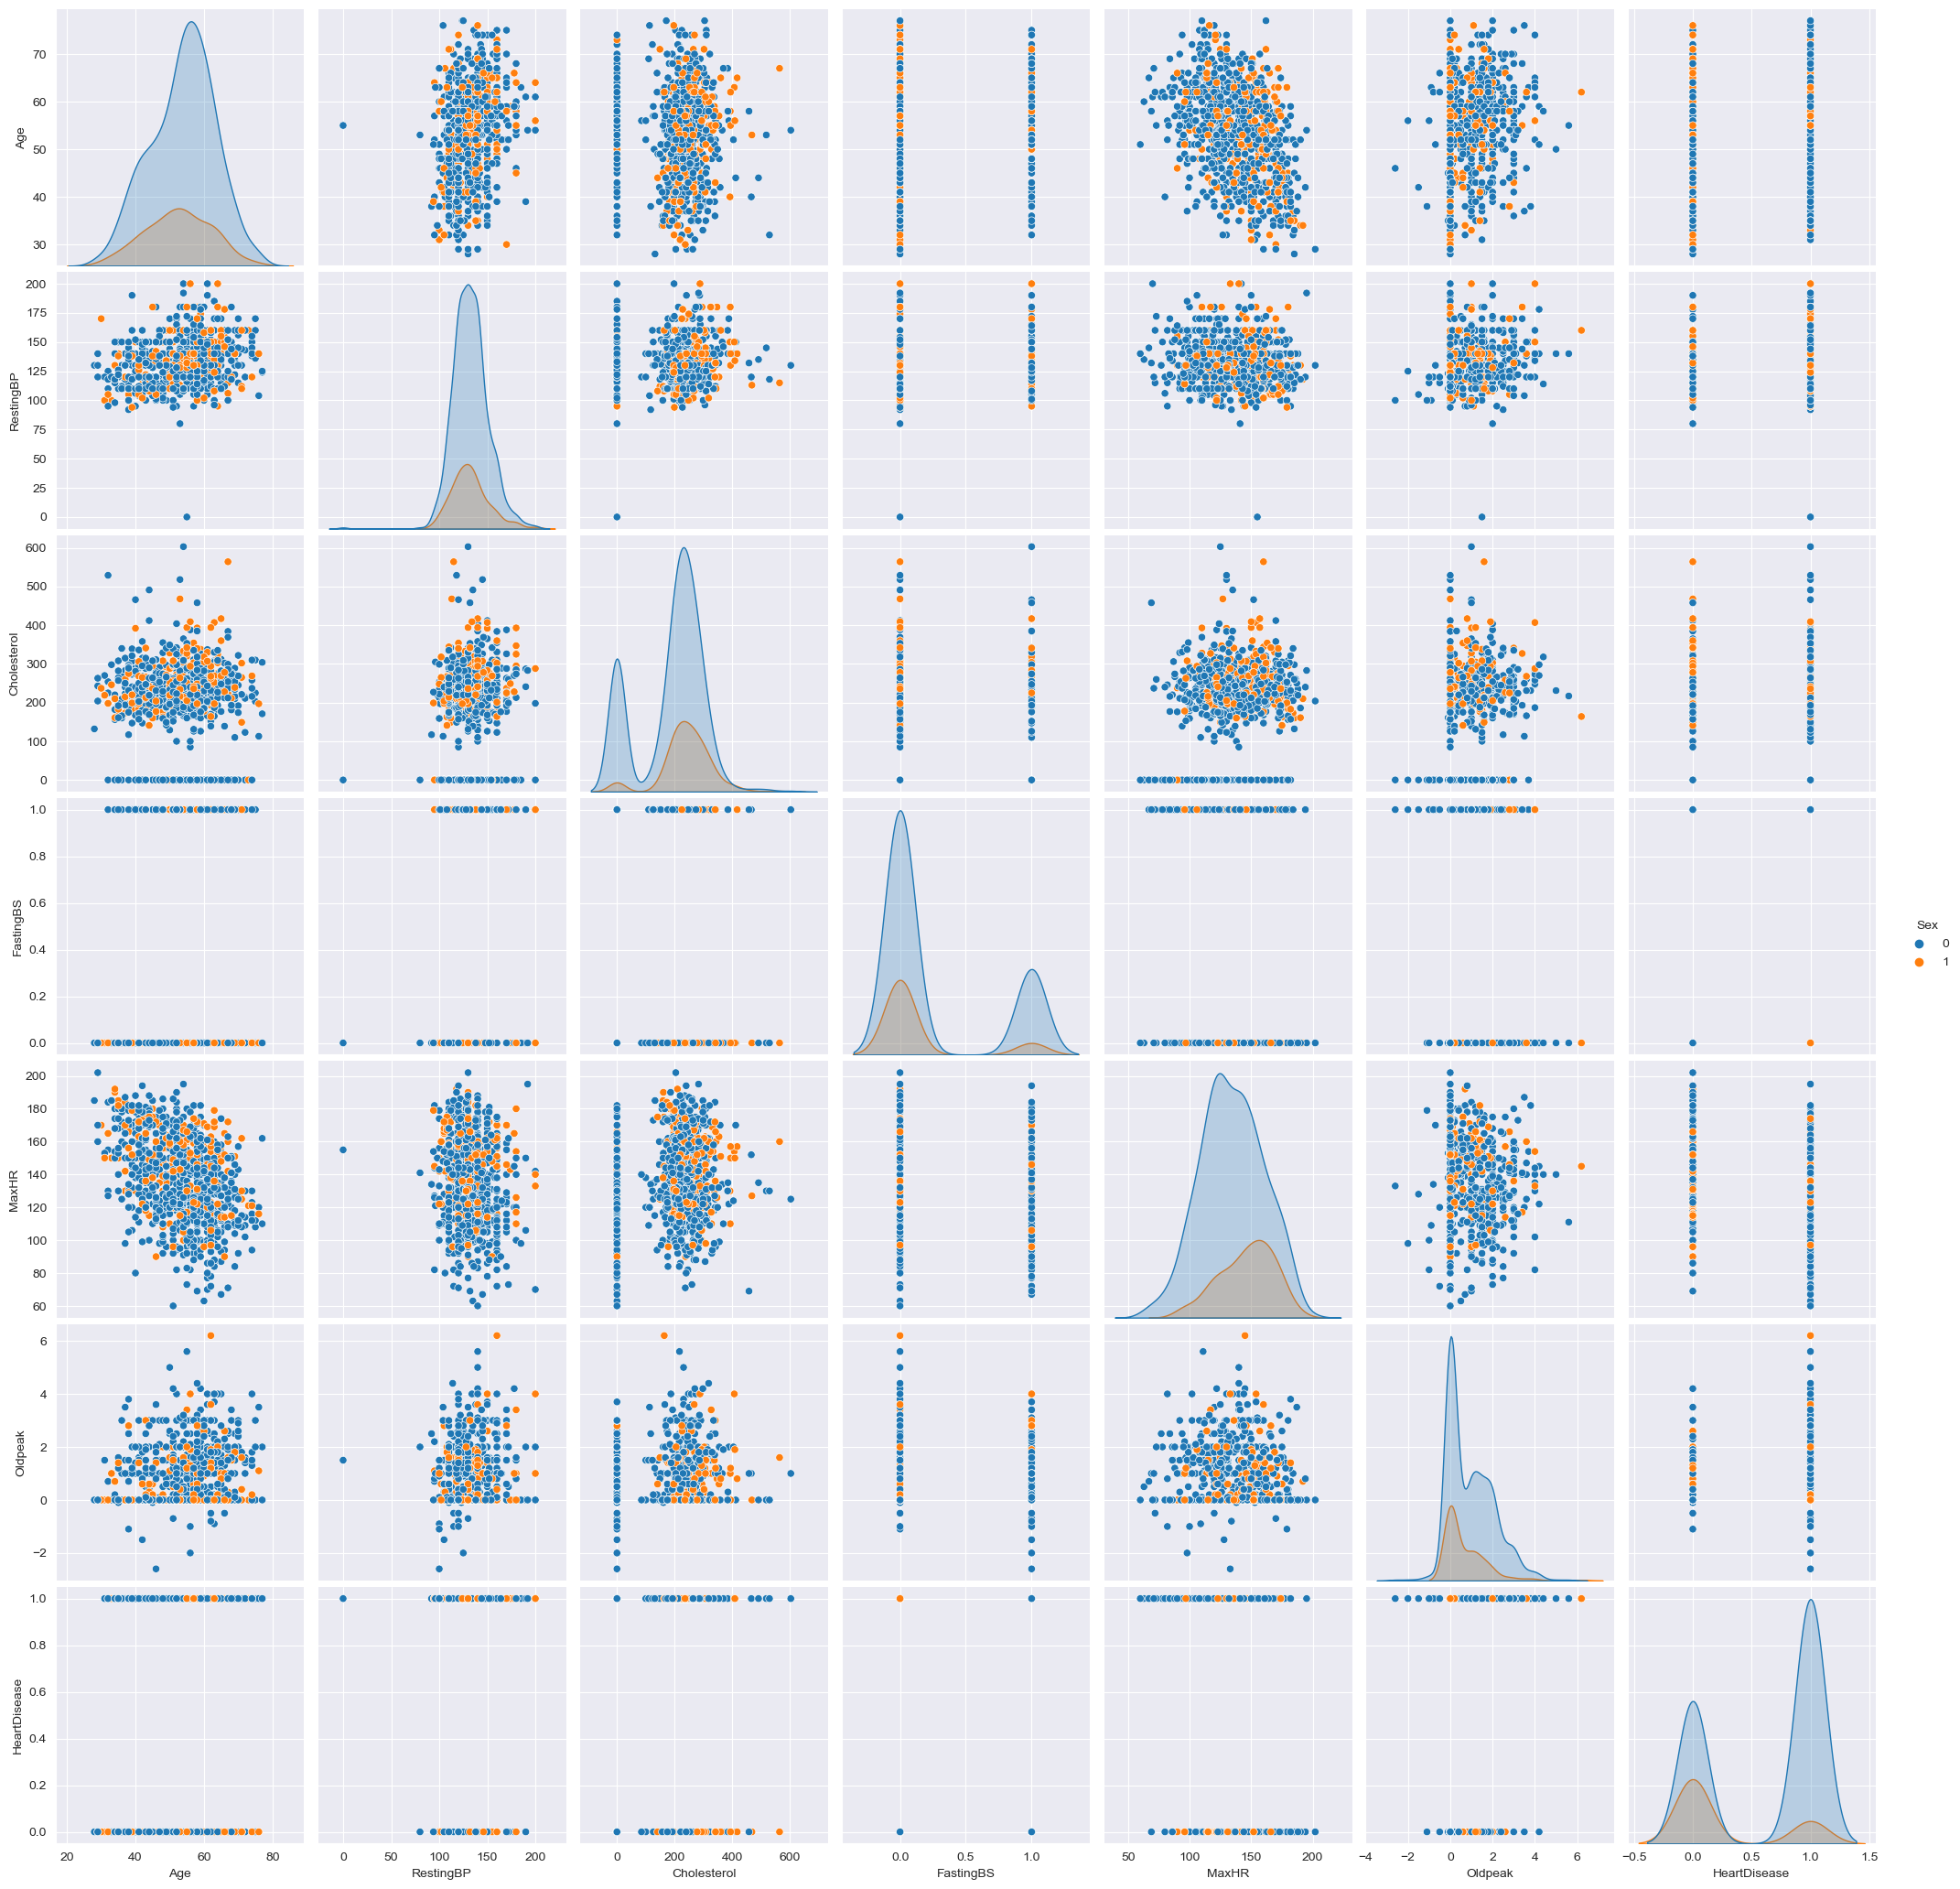

In [29]:
sns.set_style("darkgrid")
sns.pairplot(heart_data, hue="Sex",height=3);

###### train LR model

In [42]:
X = heart_data.drop(columns = 'HeartDisease' , axis = 1)
y = heart_data['HeartDisease']

In [40]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,0,140,289,0,172,0.0
1,49,1,160,180,0,156,1.0
2,37,0,130,283,0,98,0.0
3,48,1,138,214,0,108,1.5
4,54,0,150,195,0,122,0.0


In [43]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                        test_size = 0.2 , random_state = 42)

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train , y_train)

C:\Users\yuguerten\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#display the intercept and coefficient
print(" the intercept is " +  str(model.intercept_))
print(" the coeffiients are " +  str(model.coef_))
print(" the R_sqaured value is " +  str(model.score(X_train, y_train)))

 the intercept is [2.38195713]
 the coeffiients are [[ 0.01371331 -0.89799453  0.00463202 -0.0038924   0.99143159 -0.02627394
   1.03189219]]
 the R_sqaured value is 0.7942779291553134


In [52]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [53]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7942779291553134


In [55]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [56]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.782608695652174


###### building a predictive system 

In [59]:
input_data = (52 , 0,  180 ,387 , 1 ,160 , 3.2)

data_np = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = data_np.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction == 0 :
    print('the preson does not have a heart disease')
else :
    print('the prerson have a heart disease')

[1]
the prerson have a heart disease


C:\Users\yuguerten\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


###### saving the model

In [61]:
import pickle

In [62]:
filename = 'heart_disease_model.sav'
pickle.dump(model , open(filename , 'wb'))

In [64]:
#loading the model : 
loaded_model = pickle.load(open('heart_disease_model.sav' , 'rb'))

In [65]:
for column in X.columns:
  print(column)

Age
Sex
RestingBP
Cholesterol
FastingBS
MaxHR
Oldpeak
